# 一、导入数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("input/data_.xlsx",index_col=0)

In [3]:
data_ = data.copy()
data_

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big,Thickness_class,Cell Size
ID,,,,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,2,1,0,0,medium,small
1193683,1,1,2,1,3,1,1,1,1,2,1,1,0,0,thin,small
1170419,10,10,10,8,2,10,4,1,1,4,3,0,0,1,thick,big
1190386,4,6,6,5,7,6,7,7,3,4,2,0,1,0,medium,medium
1202125,4,1,1,1,2,1,3,1,1,2,2,1,0,0,medium,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,2,1,1,0,0,thin,small
1116132,6,3,4,1,5,2,3,9,1,4,2,1,0,0,medium,small
1133136,3,1,1,1,2,3,3,1,1,2,1,1,0,0,thin,small


In [4]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 1275807 to 1206314
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              645 non-null    int64 
 1   Uniformity of Cell Size      645 non-null    int64 
 2   Uniformity of Cell Shape     645 non-null    int64 
 3   Marginal Adhesion            645 non-null    int64 
 4   Single Epithelial Cell Size  645 non-null    int64 
 5   Bare Nuclei                  645 non-null    int64 
 6   Bland Chromatin              645 non-null    int64 
 7   Normal Nucleoli              645 non-null    int64 
 8   Mitoses                      645 non-null    int64 
 9   Class                        645 non-null    int64 
 10  Thickness_classnum           645 non-null    int64 
 11  Cell Size _small             645 non-null    int64 
 12  Cell Size _medium            645 non-null    int64 
 13  Cell Size _big               6

# 二、设置变量

In [5]:
features = data_.drop(columns=['Class','Thickness_class','Cell Size'])
features

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
ID,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,1,0,0
1193683,1,1,2,1,3,1,1,1,1,1,1,0,0
1170419,10,10,10,8,2,10,4,1,1,3,0,0,1
1190386,4,6,6,5,7,6,7,7,3,2,0,1,0
1202125,4,1,1,1,2,1,3,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,1,1,0,0
1116132,6,3,4,1,5,2,3,9,1,2,1,0,0
1133136,3,1,1,1,2,3,3,1,1,1,1,0,0


In [6]:
target = data_.Class.replace(to_replace = [2, 4], value = [0,1])
target

ID
1275807    0
1193683    0
1170419    1
1190386    1
1202125    0
          ..
493452     0
1116132    1
1133136    0
1158247    0
1206314    0
Name: Class, Length: 645, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
transfer = StandardScaler()

In [9]:
features_ = transfer.fit_transform(features)

In [10]:
features_

array([[-0.17231198, -0.39676889,  0.23516391, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.43303311, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [ 1.93130744,  2.20136243,  2.23975499, ..., -1.60727513,
        -0.47319015,  3.06646797],
       ...,
       [-0.52291521, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.39676889, -0.0989346 , ...,  0.62217102,
        -0.47319015, -0.32610809]])

# 三、拆分数据集

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_features, test_features, train_target, test_target = train_test_split(
    features, target, 
    test_size = 145, random_state = 99)

In [13]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(500, 13)
(500,)
(145, 13)
(145,)


# 四、建立模型

In [14]:
from sklearn.svm import SVC

In [15]:
svc_linear = SVC(kernel = "linear")

In [16]:
svc_linear.fit(train_features, train_target)

SVC(kernel='linear')

In [17]:
svc_linear.coef_

array([[ 0.53805263,  0.13457885,  0.14434002,  0.07394703, -0.02556639,
         0.22747659,  0.17697374,  0.06787877,  0.34298653, -0.7559374 ,
         0.25831728, -0.25831728,  0.        ]])

In [18]:
svc_linear.intercept_

array([-4.55846337])

In [19]:
test_predict = svc_linear.predict(test_features)
test_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [20]:
svc_linear.score(test_features,test_target)

0.9793103448275862

In [21]:
svc_poly = SVC(kernel="poly",degree=3,coef0=0.2)

In [22]:
svc_poly.fit(train_features, train_target)

SVC(coef0=0.2, kernel='poly')

In [23]:
#svc_poly.coef_

In [24]:
svc_poly.intercept_

array([-1.89660008])

In [25]:
test_predict = svc_poly.predict(test_features)
test_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [26]:
svc_poly.score(test_features,test_target)

0.9793103448275862

In [27]:
svc_rbf = SVC(kernel="rbf")

In [28]:
svc_rbf.fit(train_features, train_target)

SVC()

In [29]:
#svc_rbf.coef_

In [30]:
svc_rbf.intercept_

array([0.55493245])

In [31]:
test_predict = svc_rbf.predict(test_features)
test_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [32]:
svc_rbf.score(test_features,test_target)

0.993103448275862

# 五、查看模型效能

In [33]:
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score

In [34]:
accuracy_score(test_target,test_predict)

0.993103448275862

In [35]:
confusion_matrix(test_target,test_predict)

array([[100,   1],
       [  0,  44]])

In [36]:
import seaborn as sns

<Axes: >

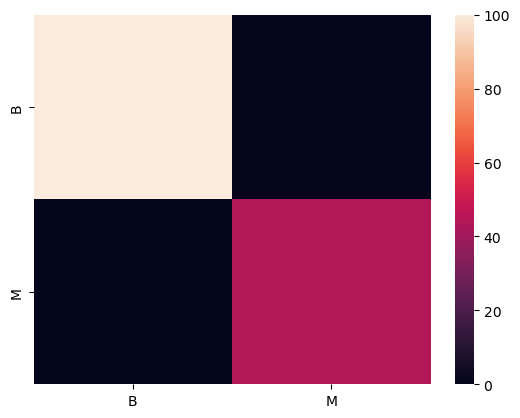

In [37]:
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])

In [38]:
y_score = svc_rbf.decision_function(test_features)

In [39]:
fpr, tpr, thresholds = roc_curve(test_target, y_score)

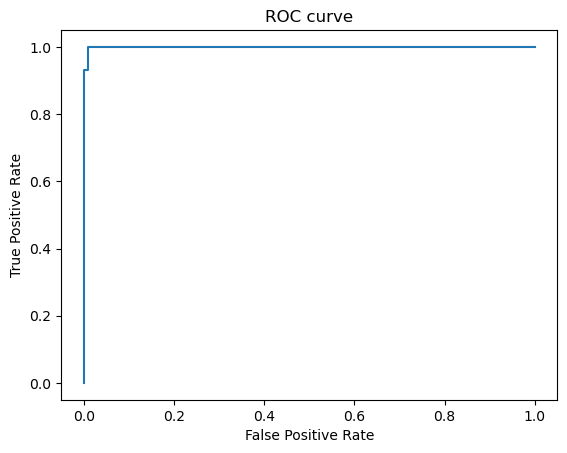

In [40]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [41]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

/root/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


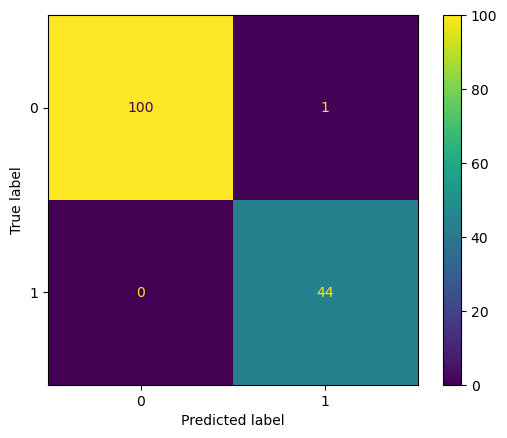

In [42]:
plot_confusion_matrix(svc_rbf, test_features, test_target)

/root/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


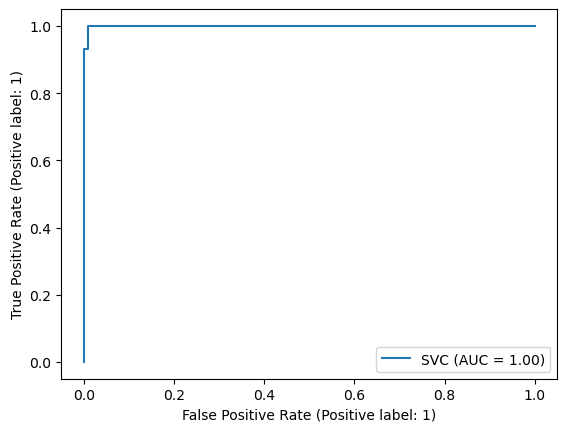

In [43]:
plot_roc_curve(svc_rbf, test_features, test_target)

/root/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


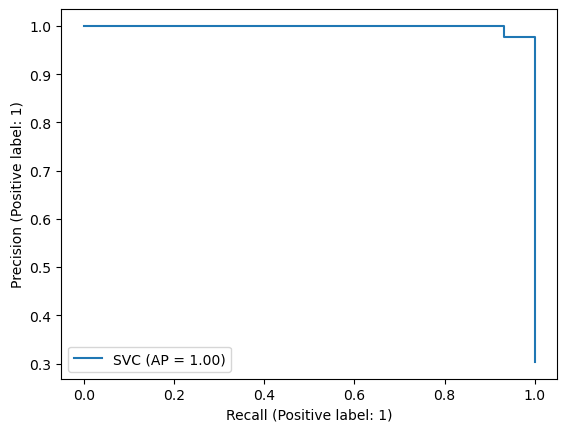

In [44]:
plot_precision_recall_curve(svc_rbf, test_features, test_target)

# 六、知识拓展

In [45]:
Cs = np.logspace(-3,2,200)

In [46]:
acc_=[]
for C_ in Cs:
    svc_rbf = SVC(kernel="rbf",C=C_)
    svc_rbf.fit(train_features, train_target)
    acc_.append(svc_rbf.score(test_features, test_target))

In [47]:
acc_

[0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.696551724137931,
 0.7034482758620689,
 0.7517241379310344,
 0.8344827586206897,
 0.896551724137931,
 0.9241379310344827,
 0.9586206896551724,
 0.9724137931034482,
 0.9724137931034482,
 0.9724137931034482,
 0.9862068965517241,
 0.9862068965517241,
 0.993103448275862,
 0.993103448275862,
 0.993103448275862,
 0.993103448275862,
 0.9862068965517241,
 0.9862068965517241,
 0.9793103448275862,
 0.9793103448275862,
 0.9862068965517241,
 0.9862068965517241,
 0.9

In [48]:
len(acc_)

200

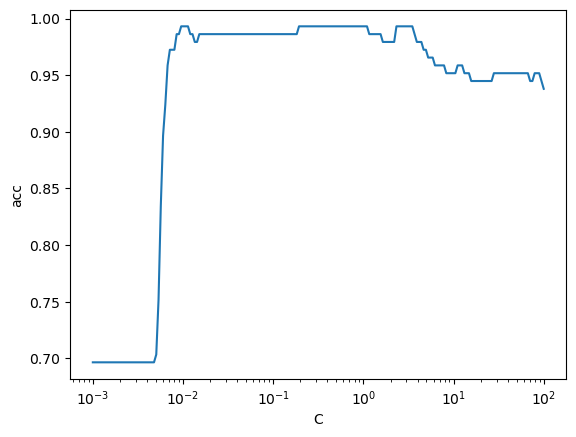

In [49]:
plt.plot(Cs, acc_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('acc')
plt.show()

In [50]:
from sklearn.metrics import auc

In [51]:
Cs = np.logspace(-3,2,200)
aucs_=[]
for C_ in Cs:
    svc_rbf = SVC(kernel="rbf",C=C_)
    svc_rbf.fit(train_features, train_target)
    y_score = svc_rbf.decision_function(test_features)
    fpr, tpr, thresholds = roc_curve(test_target, y_score)
    auc_ = auc(fpr, tpr)
    aucs_.append(auc_)

In [52]:
aucs_

[0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954995,
 0.9995499549954996,
 0.9995499549954996,
 0.9995499549954996,
 0.9995499549954996,
 0.9995499549954996,
 0.9995499549954996,
 0.9995499549

In [53]:
len(aucs_)

200

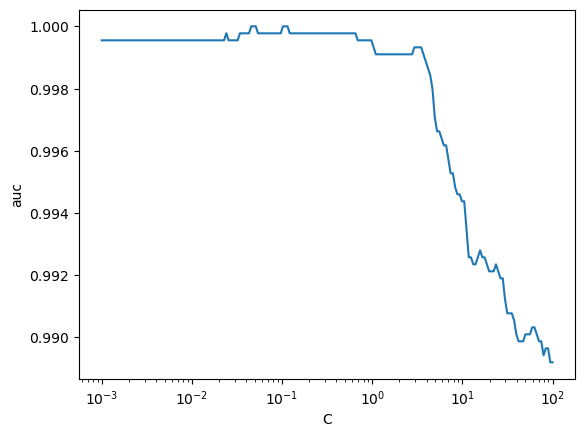

In [54]:
plt.plot(Cs, aucs_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('auc')
plt.show()